In [1]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.optimizers import SGD

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Softmax
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Reshape, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.optimizers import Adam
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:

# Hyperparameters
batch_size = 64
num_classes = 10 #pegar automaticamente NumPy.Unique
epochs = 200



In [3]:
# Load Cifar-10 Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Adicionando Canal do DataSet (Channel do MNIST eh 1)
x_train = np.reshape(x_train, (len(x_train),28,28, 1))
x_test = np.reshape(x_test, (len(x_test),28,28, 1))


#x_train.shape
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]
#channel=1

x_train.shape



(60000, 28, 28, 1)

In [4]:

#
x_train.shape

#


(60000, 28, 28, 1)

In [5]:
# convert to one hot encoing 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



In [6]:
img_width

28

In [7]:
model = Sequential()

#Filters = IMG_width/2 * 7
model.add(Conv2D(98, #alterado de 168 para 98
                 (5,5), #alterado de 3 para 5 
                 strides=(2,2), 
                 activation='relu', 
                 padding='same',
                 data_format='channels_last',
                 use_bias=True, 
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 bias_initializer='zeros',
                 input_shape=(img_height, img_width, channel)))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))

#Normalization:
#calculo da quantidade de filtros da normalização:
# Width*heigth da saída após a primeira camada de convolução+pooling
model.add(Conv2D(49, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))
model.add(Conv2D(49, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None),                  
                 data_format='channels_last'))

#Filters = IMG_width/2 * 9
model.add(Conv2D(126, 
                 (5,5), 
                 strides=(2,2), 
                 activation='relu', 
                 padding='same',
                 data_format='channels_last',
                 use_bias=True, 
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 bias_initializer='zeros',
                 input_shape=(img_height, img_width, channel)))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))
#Normalization:
#calculo da quantidade de filtros da normalização:
# Width*heigth da saída após a primeira camada de convolução+pooling
model.add(Conv2D(49, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None),                  
                 data_format='channels_last'))
model.add(Conv2D(49, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None),                  
                 data_format='channels_last'))

model.add(Flatten())
#IMG_width^ 2
model.add(Dense(784, activation='relu'))
model.add(Dropout(0.5))

#camada anterior/2
model.add(Dense(392, activation='relu'))
model.add(Dropout(0.5))

#Num de classes
model.add(Dense(10, activation='softmax'))


In [8]:

# print the model summary
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 98)        2548      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 98)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 49)          4851      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 49)          2450      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 126)         154476    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 126)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 49)          6223      
__________

In [9]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, momentum=0.02, decay=0.0, nesterov=False),
              metrics=['accuracy'])


In [10]:

# Train the Model
#earlyStopping=keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=13, verbose=1, mode='auto')
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
#                    callbacks=[earlyStopping],
                    validation_data=(x_test, y_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 32s 528us/step - loss: 0.6898 - acc: 0.7690 - val_loss: 0.1570 - val_acc: 0.9525
Epoch 2/200
60000/60000 [==============================] - 32s 530us/step - loss: 0.1380 - acc: 0.9596 - val_loss: 0.0808 - val_acc: 0.9741
Epoch 3/200
60000/60000 [==============================] - 32s 532us/step - loss: 0.1008 - acc: 0.9706 - val_loss: 0.0499 - val_acc: 0.9835
Epoch 4/200
60000/60000 [==============================] - 32s 531us/step - loss: 0.0779 - acc: 0.9774 - val_loss: 0.0594 - val_acc: 0.9814
Epoch 5/200
60000/60000 [==============================] - 32s 530us/step - loss: 0.0665 - acc: 0.9804 - val_loss: 0.0460 - val_acc: 0.9843
Epoch 6/200
60000/60000 [==============================] - 32s 533us/step - loss: 0.0571 - acc: 0.9836 - val_loss: 0.0393 - val_acc: 0.9874
Epoch 7/200
60000/60000 [==============================] - 32s 533us/step - loss: 0.0501 - acc: 0.9849 - val_l

Epoch 59/200
60000/60000 [==============================] - 32s 532us/step - loss: 0.0024 - acc: 0.9993 - val_loss: 0.0450 - val_acc: 0.9916
Epoch 60/200
60000/60000 [==============================] - 32s 535us/step - loss: 0.0052 - acc: 0.9984 - val_loss: 0.0589 - val_acc: 0.9875
Epoch 61/200
60000/60000 [==============================] - 32s 533us/step - loss: 0.0035 - acc: 0.9988 - val_loss: 0.0448 - val_acc: 0.9916
Epoch 62/200
60000/60000 [==============================] - 32s 534us/step - loss: 0.0042 - acc: 0.9985 - val_loss: 0.0447 - val_acc: 0.9922
Epoch 63/200
60000/60000 [==============================] - 32s 535us/step - loss: 0.0028 - acc: 0.9990 - val_loss: 0.0437 - val_acc: 0.9923
Epoch 64/200
60000/60000 [==============================] - 32s 536us/step - loss: 0.0039 - acc: 0.9989 - val_loss: 0.0539 - val_acc: 0.9911
Epoch 65/200
60000/60000 [==============================] - 32s 534us/step - loss: 0.0021 - acc: 0.9994 - val_loss: 0.0492 - val_acc: 0.9922
Epoch 66/200


60000/60000 [==============================] - 51s 855us/step - loss: 0.0012 - acc: 0.9997 - val_loss: 0.0459 - val_acc: 0.9921
Epoch 117/200
60000/60000 [==============================] - 51s 852us/step - loss: 0.0012 - acc: 0.9996 - val_loss: 0.0509 - val_acc: 0.9916
Epoch 118/200
60000/60000 [==============================] - 51s 855us/step - loss: 0.0010 - acc: 0.9997 - val_loss: 0.0463 - val_acc: 0.9923
Epoch 119/200
60000/60000 [==============================] - 51s 849us/step - loss: 0.0010 - acc: 0.9997 - val_loss: 0.0497 - val_acc: 0.9918
Epoch 120/200
60000/60000 [==============================] - 51s 855us/step - loss: 0.0025 - acc: 0.9994 - val_loss: 0.0534 - val_acc: 0.9914
Epoch 121/200
60000/60000 [==============================] - 51s 855us/step - loss: 0.0066 - acc: 0.9982 - val_loss: 0.0596 - val_acc: 0.9902
Epoch 122/200
60000/60000 [==============================] - 51s 857us/step - loss: 0.0036 - acc: 0.9989 - val_loss: 0.0570 - val_acc: 0.9912
Epoch 123/200
60000/

60000/60000 [==============================] - 51s 854us/step - loss: 0.0031 - acc: 0.9993 - val_loss: 0.0470 - val_acc: 0.9924
Epoch 174/200
60000/60000 [==============================] - 51s 854us/step - loss: 0.0026 - acc: 0.9993 - val_loss: 0.0577 - val_acc: 0.9907
Epoch 175/200
60000/60000 [==============================] - 51s 855us/step - loss: 0.0029 - acc: 0.9993 - val_loss: 0.0486 - val_acc: 0.9921
Epoch 176/200
60000/60000 [==============================] - 51s 856us/step - loss: 5.9784e-04 - acc: 0.9998 - val_loss: 0.0487 - val_acc: 0.9926
Epoch 177/200
60000/60000 [==============================] - 51s 855us/step - loss: 3.4224e-04 - acc: 0.9999 - val_loss: 0.0496 - val_acc: 0.9927
Epoch 178/200
60000/60000 [==============================] - 51s 857us/step - loss: 2.1469e-04 - acc: 0.9999 - val_loss: 0.0432 - val_acc: 0.9924
Epoch 179/200
60000/60000 [==============================] - 51s 855us/step - loss: 2.3226e-04 - acc: 0.9999 - val_loss: 0.0460 - val_acc: 0.9929
Epoc

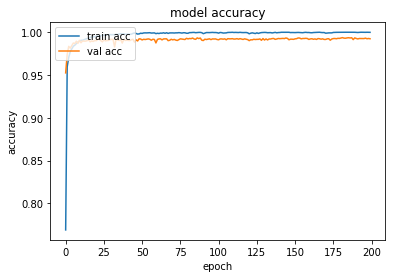

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc','val acc'], loc='upper left')
plt.show()

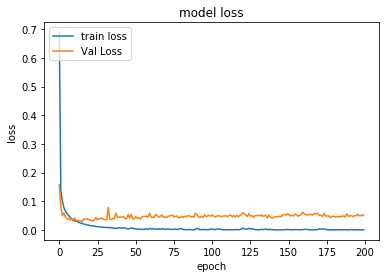

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss','Val Loss'], loc='upper left')
plt.show()

In [13]:
# Test the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0527581246467
Test accuracy: 0.9924


In [14]:
print(history.history)

{'val_loss': [0.15704860073709861, 0.080775224628485742, 0.049936346182227136, 0.059407582717295737, 0.046045856665715111, 0.039338039717962965, 0.040020385260088366, 0.033947944030299548, 0.041011427150864622, 0.03074300321292394, 0.041529222955887964, 0.032237644835535317, 0.033452432965320258, 0.031954288615635595, 0.031445464835719028, 0.030091059081534331, 0.038502122333940313, 0.036231944926136017, 0.039205764357396401, 0.036026905714764509, 0.035273349180696092, 0.033151569459991335, 0.031766644789360546, 0.035027555194011802, 0.043584976777800877, 0.035407582562195693, 0.038199597578565225, 0.040944123070359183, 0.041409014441316595, 0.036841269980423023, 0.035652320314782902, 0.035808084855953985, 0.078454478200514127, 0.037043956092738382, 0.035743668523286712, 0.039159669361118858, 0.03992377281320323, 0.058565901803053842, 0.043354777543675484, 0.044624896139274735, 0.045288602834020454, 0.04472805690881896, 0.046074065552412412, 0.040222170172559801, 0.039916777860027286, 

In [16]:
import pandas as pd
import datetime
data = pd.DataFrame(history.history)
nome = 'DoubleConvMNISTNorm_t1' + str(datetime.datetime.now())+'.json'
data = data.to_json()
with open(nome, "w+") as output_file:
    output_file.write(data)